In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.9MB 34.9MB/s 
     |████████████████████████████████| 450kB 71.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
!unzip /content/datasetToUse.zip

Archive:  /content/datasetToUse.zip
   creating: datasetToUse/
   creating: datasetToUse/test/
   creating: datasetToUse/test/Stop Navigation/
  inflating: datasetToUse/test/Stop Navigation/10.jpg  
  inflating: datasetToUse/test/Stop Navigation/100.jpg  
  inflating: datasetToUse/test/Stop Navigation/109.jpg  
  inflating: datasetToUse/test/Stop Navigation/110.jpg  
  inflating: datasetToUse/test/Stop Navigation/119.jpg  
  inflating: datasetToUse/test/Stop Navigation/120.jpg  
  inflating: datasetToUse/test/Stop Navigation/129.jpg  
  inflating: datasetToUse/test/Stop Navigation/130.jpg  
  inflating: datasetToUse/test/Stop Navigation/139.jpg  
  inflating: datasetToUse/test/Stop Navigation/140.jpg  
  inflating: datasetToUse/test/Stop Navigation/19.jpg  
  inflating: datasetToUse/test/Stop Navigation/20.jpg  
  inflating: datasetToUse/test/Stop Navigation/29.jpg  
  inflating: datasetToUse/test/Stop Navigation/30.jpg  
  inflating: datasetToUse/test/Stop Navigation/39.jpg  
  inflat

In [4]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 224*224 pixels
pic_size = 224

# input path for the images
base_path = "/content/datasetToUse/"

Using TensorFlow backend.


In [5]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")
for expression in os.listdir(base_path + "test"):
    print(str(len(os.listdir(base_path + "test/" + expression))) + " " + expression + " images")



136 Good Bye images
136 Previous images
136 Next images
136 Start images
136 I love this game images
136 Connection images
136 Excuse me images
136 How are you images
136 Choose images
136 Stop Navigation images
136 I am sorry images
136 Stop images
136 Navigation images
136 You are welcome images
136 Begin images
136 Hello images
136 Have a good time images
136 Web images
136 Nice to meet you images
136 Thank you images
34 Good Bye images
34 Previous images
34 Next images
34 Start images
34 I love this game images
34 Connection images
34 Excuse me images
34 How are you images
34 Choose images
34 Stop Navigation images
34 I am sorry images
34 Stop images
34 Navigation images
34 You are welcome images
34 Begin images
34 Hello images
34 Have a good time images
34 Web images
34 Nice to meet you images
34 Thank you images


In [7]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 20

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 2720 images belonging to 20 classes.
Found 680 images belonging to 20 classes.


In [0]:
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# number of possible label values
nb_classes = 20

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(224, 224,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     5

In [10]:
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("my_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 136 steps, validate for 34 steps
Epoch 1/50
136/136 [==============================] - 20s 148ms/step - loss: 3.2745 - accuracy: 0.0699 - val_loss: 2.9955 - val_accuracy: 0.0750
Epoch 2/50
  1/136 [..............................] - ETA: 15s - loss: 3.2268 - accuracy: 0.1000

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


136/136 [==============================] - 13s 93ms/step - loss: 2.9945 - accuracy: 0.1158 - val_loss: 3.0576 - val_accuracy: 0.0985
Epoch 3/50
136/136 [==============================] - 13s 93ms/step - loss: 2.8315 - accuracy: 0.1463 - val_loss: 3.0014 - val_accuracy: 0.0926
Epoch 4/50
136/136 [==============================] - 13s 94ms/step - loss: 2.7814 - accuracy: 0.1555 - val_loss: 2.9347 - val_accuracy: 0.1250
Epoch 5/50
136/136 [==============================] - 13s 94ms/step - loss: 2.6256 - accuracy: 0.1809 - val_loss: 2.8373 - val_accuracy: 0.1603
Epoch 6/50
136/136 [==============================] - 13s 93ms/step - loss: 2.4943 - accuracy: 0.2180 - val_loss: 2.8428 - val_accuracy: 0.1485
Epoch 7/50
136/136 [==============================] - 13s 93ms/step - loss: 2.3574 - accuracy: 0.2735 - val_loss: 2.7218 - val_accuracy: 0.1882
Epoch 8/50
136/136 [==============================] - 13s 93ms/step - loss: 2.1999 - accuracy: 0.3239 - val_loss: 2.6223 - val_accuracy: 0.2147
Epo

In [0]:
#model.summary()
from keras.models import load_model

# serialize model structure to JSON
model_json = model.to_json()
with open("my_newmodel.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('my_newmodel.h5') 

fname = "newweightsCNNmodel.hdf5"
model.save_weights(fname, overwrite = True)
# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

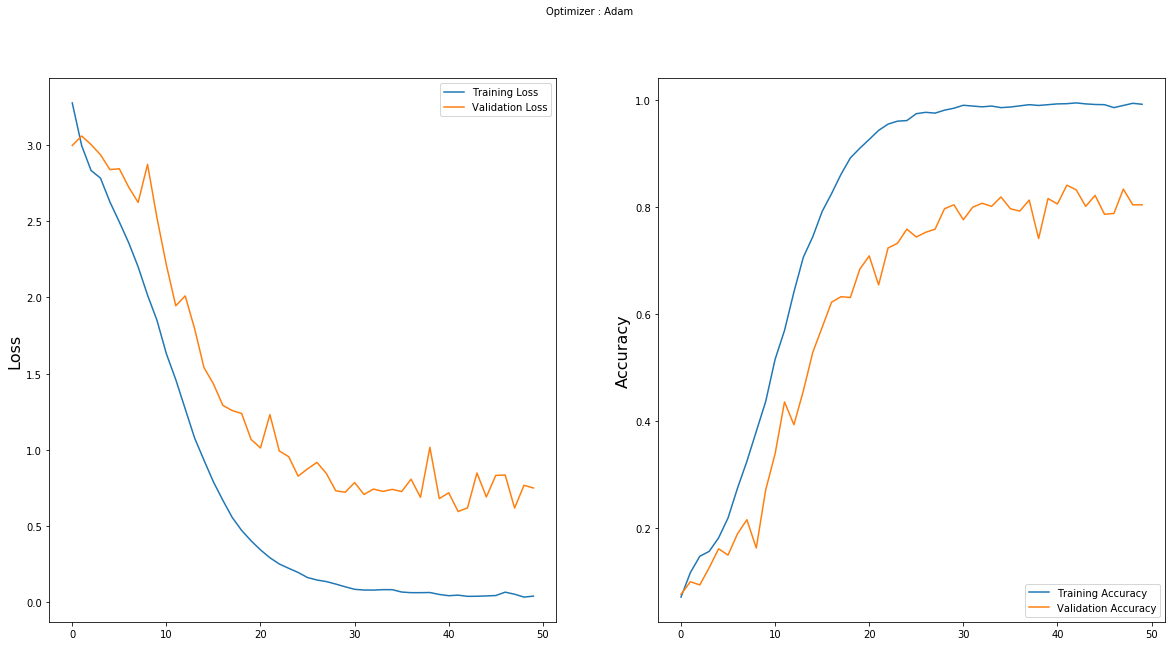

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Instructions for updating:
Please use Model.predict, which supports generators.


<Figure size 432x288 with 0 Axes>

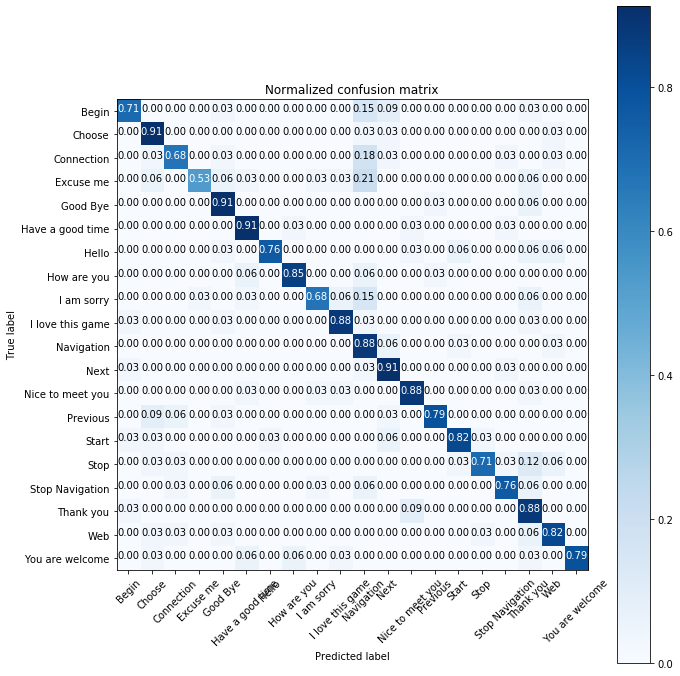

In [13]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [0]:
from keras.models import model_from_json
import numpy as np

EMOTIONS_LIST = ["Begin", "Choose", "Connection", "Excuse me", "Good Bye", "Have a good time",
                     "Hello", "How are you", "I am sorry", "I love this game", "Navigation", 
                     "Next", "Nice to meet you" ,"Previous", "Start", "Stop", "Stop Navigation",
                     "Thank you", "Web", "You are welcome"]


In [0]:
import cv2
image = cv2.imread('/content/datasetToUse/train/Have a good time/101.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = gray.reshape(224,224,1)

In [16]:
EMOTIONS_LIST[model.predict_classes(np.array([gray]))[0]]

'Have a good time'

In [0]:
model.predict(np.array([gray]))

array([[1.55e-04, 3.10e-05, 9.33e-05, 1.42e-06, 3.49e-04, 1.26e-04,
        2.10e-04, 3.19e-05, 4.26e-04, 1.17e-06, 4.48e-05, 1.22e-05,
        1.99e-06, 6.86e-05, 2.11e-05, 1.35e-05, 2.16e-06, 9.98e-01,
        1.38e-05, 8.90e-06]], dtype=float32)

In [0]:
!pip install h5py pyyaml